# ***Ujian Tengah Semester***
**Digunakan untuk penyelesaian tugas UTS Mata kuliah Machine Learning Politkenik Negeri Malang Tahun 2022**
# Identitas Mahasiswa
Sendy Joan Kevin 
 | 2041720121 | 
TI-3G
# Metode Yang Digunakan 
Regression

In [51]:
# Melakukan Import Package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [52]:
# Melakukan Import Dataset
data = pd.read_csv('https://storage.googleapis.com/sendyjoan_bucket1/dataset_3.csv')
data.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [53]:
# ukuran data
print('Shape Data')
data.shape

# info data
print('Infor Data')
data.info()

# deskripsi data
print('Deskripsi Data')
data.describe()

Shape Data
Infor Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DateTime                   52416 non-null  object 
 1   Temperature                52416 non-null  float64
 2   Humidity                   52416 non-null  float64
 3   Wind Speed                 52416 non-null  float64
 4   general diffuse flows      52416 non-null  float64
 5   diffuse flows              52416 non-null  float64
 6   Zone 1 Power Consumption   52416 non-null  float64
 7   Zone 2  Power Consumption  52416 non-null  float64
 8   Zone 3  Power Consumption  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB
Deskripsi Data


,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


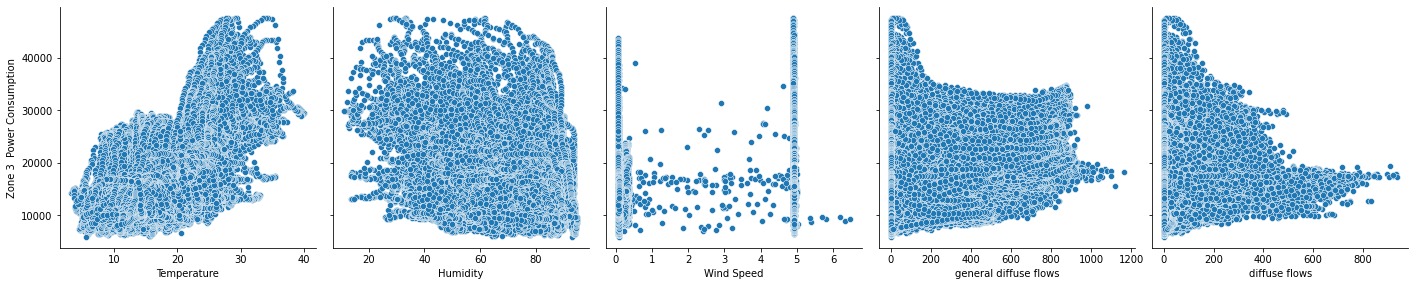

In [54]:
# operasi visualisasi
sns.pairplot(data, x_vars=['Temperature', 'Humidity','Wind Speed', 'general diffuse flows', 'diffuse flows'], 
             y_vars='Zone 3  Power Consumption', size=4, aspect=1, kind='scatter')
plt.show()

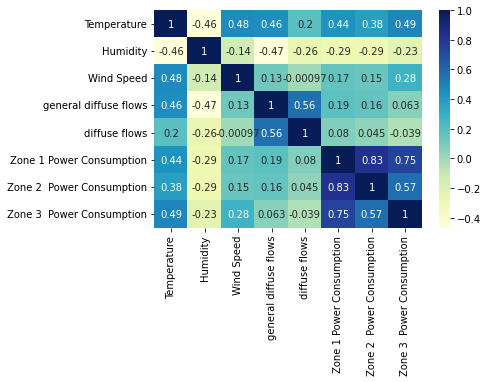

In [55]:
# Menunjukkan Korelasi yang tepat
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [56]:
# Membuat variabel bebas X dan Y
X = data['Temperature']
y = data['Zone 3  Power Consumption']

In [57]:
# Buat pemisahan data uji dan data latih dengan proporsi 7:3
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [58]:
# hasil training dtaset
X_train
y_train

10378    15294.19355
8266     13974.51256
3753     15458.31325
3520     15400.48193
24949    12187.56923
            ...     
16304    13893.81818
79       17436.14458
12119    14016.77419
14147    12171.63636
38408    13179.16241
Name: Zone 3  Power Consumption, Length: 36691, dtype: float64

In [59]:
# training model
X_train_sm = sm.add_constant(X_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [60]:
# fitting garis regresi
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const          7356.457708
Temperature     555.741565
dtype: float64

In [61]:
# analisis statistika dari garis regresi
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Zone 3  Power Consumption   R-squared:                       0.238
Model:                                   OLS   Adj. R-squared:                  0.238
Method:                        Least Squares   F-statistic:                 1.148e+04
Date:                       Fri, 28 Oct 2022   Prob (F-statistic):               0.00
Time:                               08:51:28   Log-Likelihood:            -3.6983e+05
No. Observations:                      36691   AIC:                         7.397e+05
Df Residuals:                          36689   BIC:                         7.397e+05
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7356.4577    102.096     72.055      0.000    7156.348    7556.568
Temperature   555.7416      5.186    107.164      0.000     545.577     565.906
==============================================================================
Omnibus:                     2930.621   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3704.464
Skew:                           0.737   Prob(JB):                         0.00
Kurtosis:                       3.502   Cond. No.                         66.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

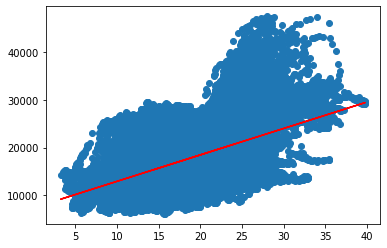

In [62]:
# visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, 7356.4577 + 555.7416 *X_train, 'r')
plt.show()

In [63]:
# prediksi y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)

res = (y_train - y_train_pred)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


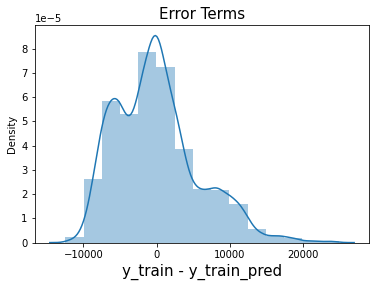

In [64]:
# cek histogram apakah berdistribusi normal atau tidak
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

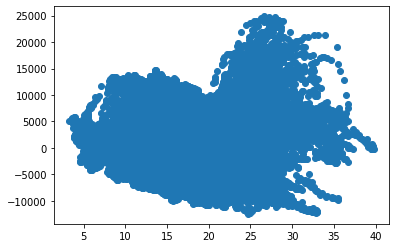

In [65]:
plt.scatter(X_train,res)
plt.show()

In [66]:
# prediksi pada data uji dan evaluasi model
X_test_sm = sm.add_constant(X_test)

# prediksi y value yang berkorelasi dengan X_test_sm
y_test_pred = lr.predict(X_test_sm)

# cetak 5 data terprediksi teratas
y_test_pred.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


49112    13063.923580
26875    24456.625662
7205     15120.167371
25106    18693.585634
34813    23356.257364
dtype: float64

In [67]:
# hitung nilai r^2
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.24237117717459467

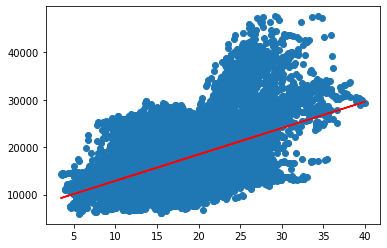

In [68]:
# visualisasi data
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()